# Problem Understanding: Water Quality

Data source: https://www.kaggle.com/datasets/adityakadiwal/water-potability

As motivation the author of the dataset says the following:

> Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

In order to be clean enough for drinking, water needs to fulfill different criteria. This dataset contains 9 features, that describe different aspects of water and which can be used to classify water in drinkable or not drinkable. The following features are given:

|Feature | Short Description |
|--------|:-------------|
|ph      | pH of water (0 to 14)|
|Hardness| Capacity of water to precipitate soap in mg/L.|
|Solids  | Total dissolved solids in ppm.|
|Chloramines | Amount of Chloramines in ppm.|
|Sulfate | Amount of Sulfates dissolved in mg/L.|
|Conductivity | Electrical conductivity of water in μS/cm.|
|Organic_carbon | Amount of organic carbon in ppm.|
|Trihalomethanes | Amount of Trihalomethanes in μg/L.|
|Turbidity | Measure of light emiting property of water in NTU.|
|**Potability (label)**| Indicates if water is safe for human consumption. Potable: 1, Not potable: 0|

The author of the dataset gives a more detailed description:

>**pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.
>
>**Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
>
>**Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
>
>**Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
>
>**Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.
>
>**Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.
>
>**Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
>
>**Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
>
>**Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

# Setup

Load all packages needed for this notebook

In [1]:
import pandas as pd
import numpy as np
import random

# sklearn package for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# pytorch packages
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# set a fixed random state to produce the same results
RANDOM_STATE = 42
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

# Read Data

The data is stored in a ```.csv``` file, we use pandas to read it as a dataframe (```df```). To get a first impression of the data, we use ```df.head()``` and ```df.tail``` to show the first and last rows of the dataframe.

In [2]:
df = pd.read_csv("data/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


We use ```df.info()``` to show us if and how many missing values the dataframe contains and the type of each feature. Then we use ```df.describe()``` to get some statistacal parameters.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Observations:**

* The dataset contains 9 input features and the target 
* There are missing values. For we will impute all missing values with the mean of the feature values.
* The features have different magnitudes. In the next section we will scale it.

In [6]:
df["ph"].fillna(value=df["ph"].mean(),inplace=True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

# Preprocessing

We call again ```df.info()``` and see that now there are no missing values in the data any more.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Plot the Label and Input Feature Distributions

Now we have a look at the distributions of the label and the features. 

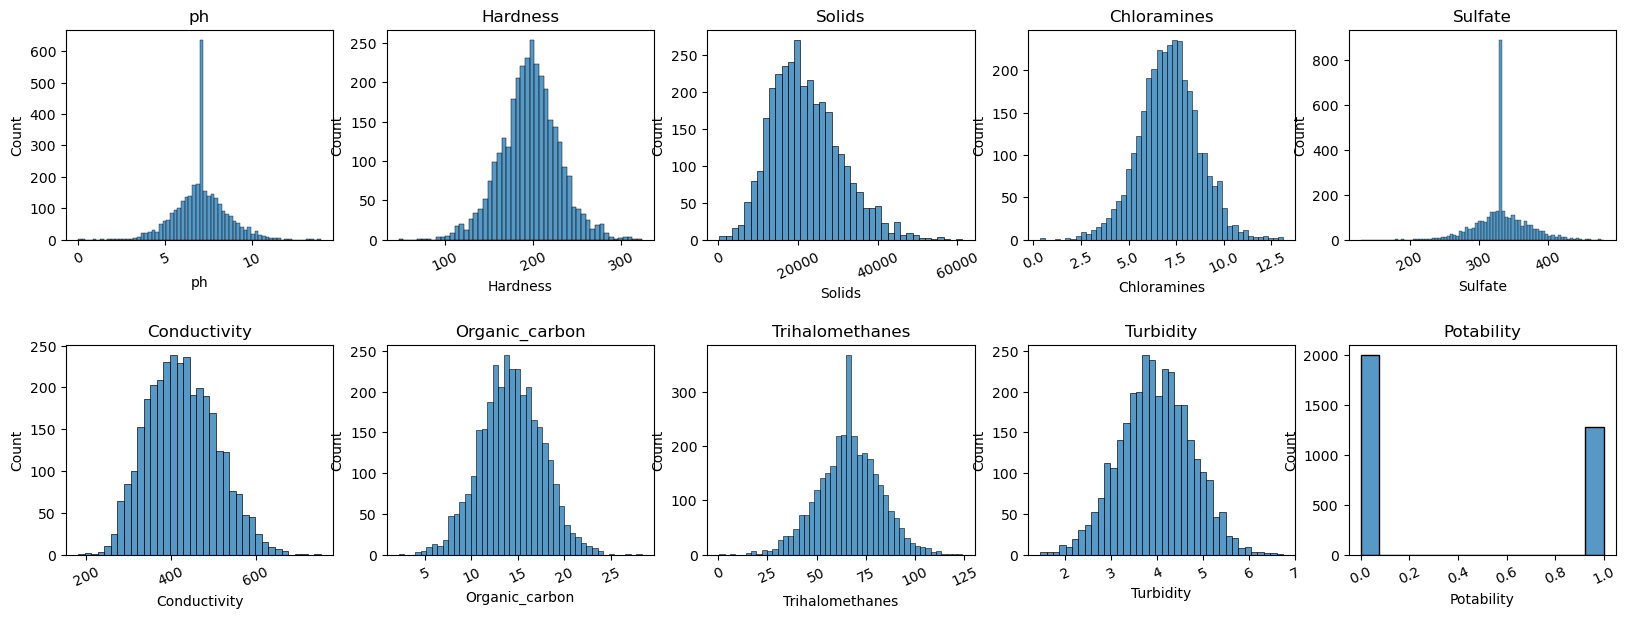

In [8]:
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
for i, col in enumerate(df.iloc[:,:20].columns):
    ax = fig.add_subplot(4, 5, i + 1)
    ax.set_title(col)
    sns.histplot(df[col])
    plt.xticks(rotation=25)

We can observe that the plots are mainly normally distributed. Some features (as e.g. ph and sulfate) show a strong peak in the center.

Let's have a closer look at the distribution of the labels.

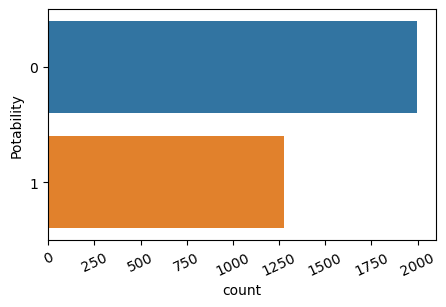

In [9]:
fig = plt.figure(figsize=(5, 3))
p = sns.countplot(y='Potability', data=df)
plt.xticks(rotation=25);

In [46]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

## Train-Val-Test Split

Divide the dataset in 3 splits: 1 for training, 1 for validation and 1 for testing.

The splits are generated randomly, 80% are considered for the training data and about 10% for each validation and test data. We use the [```train_test_split```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from sklearn.

In [11]:
# store inputs and label
X = df.iloc[:,:-1]
y = df["Potability"]

In [12]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_STATE, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.11, random_state=RANDOM_STATE, shuffle=True)

In [13]:
print(f"Length training data: {len(X_train)}")
print(f"Length validation data: {len(X_val)}")
print(f"Length test data: {len(X_test)}")

Length training data: 2623
Length validation data: 325
Length test data: 328


We see that the label is not equally distributed. There are different possibilities how to deal with this. For the sake of simplicity, we will upsample the minority class by randomly drawing samples until we reach the number of samples of the majority class. Note, that this may lead to overfitting, since we use the exact same samples again.

In order to to the upsampling, we will use the [```resample```](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html) method from sklearn.

In [14]:
# define two dataframes 
# one with only positive (minority class) and one with only negative (majority class) labels
df_tmp = pd.concat([X_train, y_train], axis=1, join="inner")

df_pos = df_tmp[df_tmp['Potability'] == 1]
df_neg = df_tmp[df_tmp['Potability'] == 0]

water_upsample = resample(df_pos,
             replace=True,
             n_samples=(df_tmp['Potability'] == 0).sum(),
             random_state=RANDOM_STATE)

print(water_upsample.shape)

(1607, 10)


In [15]:
# concatenate the upsampled minority class with the majority class
df_upsampled = pd.concat([water_upsample, df_neg])
df_upsampled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2338,7.973308,237.497153,23517.681011,5.354516,283.583834,478.893616,15.259598,53.671478,2.826112,1
1894,7.040395,199.079217,22505.518597,7.953572,333.775777,531.476666,14.690954,58.412860,3.931917,1
1167,7.080795,182.317256,30430.211752,6.151217,350.448584,479.957076,16.576565,58.675066,4.536123,1
1936,7.080795,165.892970,11566.875548,8.326155,333.775777,369.289777,7.401868,66.686950,3.603090,1
2049,7.096047,221.508245,17240.021065,9.181473,322.616878,442.543599,16.576200,78.122091,4.785637,1


We plot the label distribution again and see that now both classes contain the same amount of samples.

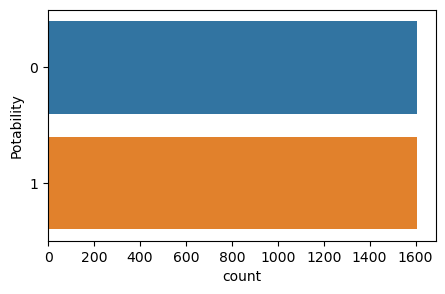

In [16]:
fig = plt.figure(figsize=(5, 3))
p = sns.countplot(y=df_upsampled['Potability'], data=df_upsampled);

Divide input features (X) and label (y)

In [17]:
# store inputs and label
X_train = df_upsampled.iloc[:,:-1]
y_train = df_upsampled["Potability"]

## Scale Input Features

Our dataset only contains numerical data, i.e. all features can be preprocessed equally. We use the [```StandardScaler()```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from sklearn to do standardize the features.

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Plot the scaled training, validation and test dataset.

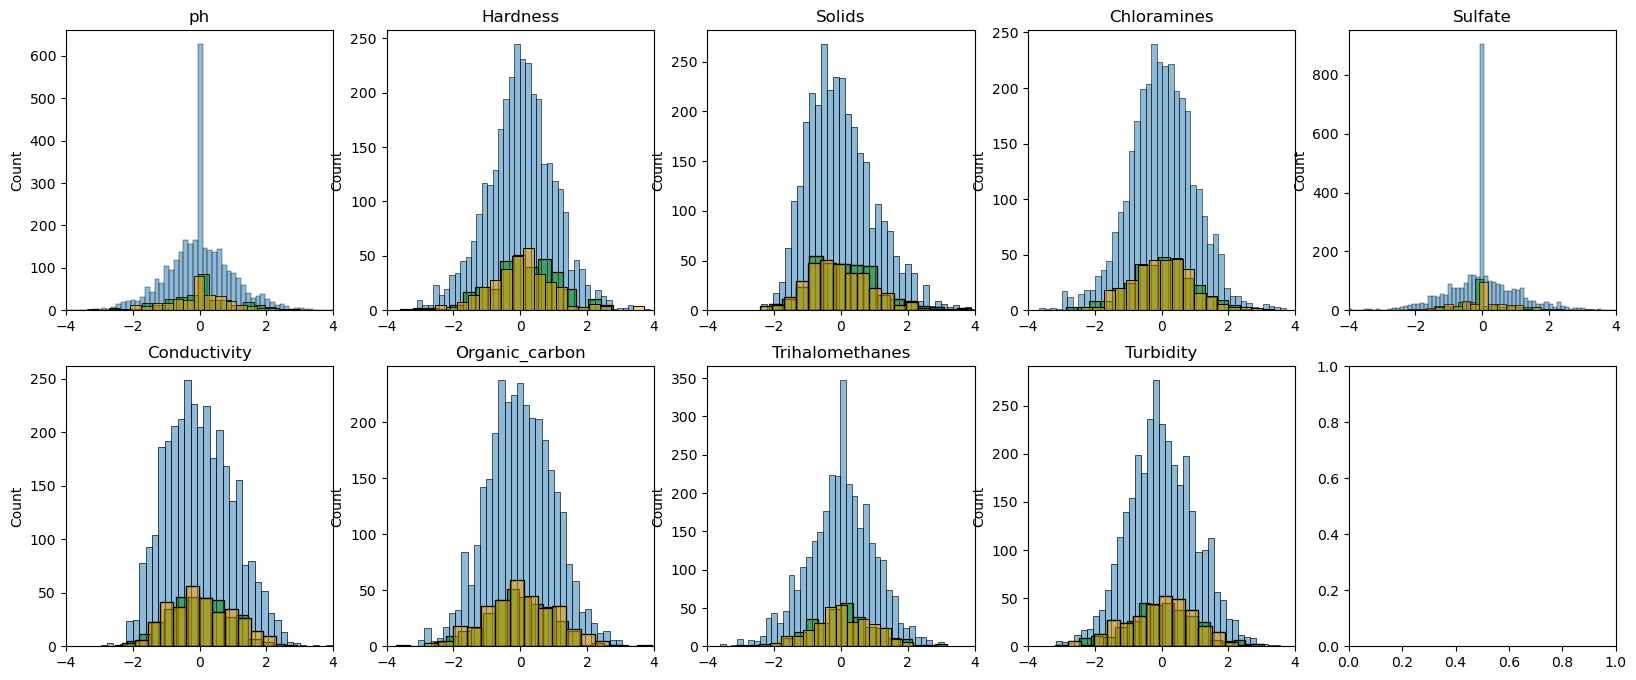

In [19]:
fig, axis = plt.subplots(2, 5, figsize=(20,8))
for i, ax in enumerate(axis.flat):
    sns.histplot(X_train[:,i], ax=ax, alpha=0.5)
    sns.histplot(X_val[:,i], ax=ax, color='green', alpha=0.5)
    sns.histplot(X_test[:,i], ax=ax, color='orange', alpha=0.5)
    ax.set_title(df.columns[i])
    ax.set_xlim(-4,4)
    if i == 8:
        break

# Create a PyTorch Dataset

To use the data in a PyTorch model, we first have to create a PyTorch Dataset. For this we inherit from the Dataset class and overwrite the methods ```__init__```, ```__len__```, and ```__getitem__```. The Dataset stores the features and their corresponding labels.

In [20]:
class WaterDataset(Dataset):
    def __init__(self, X, y):
        
        # The __init__ function is run once when instantiating the Dataset object.
        self.X = torch.tensor(X)
        self.y = torch.tensor(np.array(y).astype(float))
        
    def __len__(self):
        
        # The __len__ function returns the number of samples in our dataset.
        return len(self.y)
        
    def __getitem__(self, idx):
        
        # The __getitem__ function loads and returns a sample from the dataset
        # at the given index idx.
        return self.X[idx], self.y[idx]

Let's create datasets for our training, validation and test data.

In [21]:
train_dataset = WaterDataset(X_train, y_train)
val_dataset = WaterDataset(X_val, y_val)
test_dataset = WaterDataset(X_test, y_test)

The data can now be accessed as follows:

In [22]:
train_dataset.X

tensor([[ 0.6302,  1.2692,  0.1785,  ...,  0.3093, -0.7616, -1.4474],
        [-0.0220,  0.1006,  0.0645,  ...,  0.1337, -0.4631, -0.0356],
        [ 0.0062, -0.4093,  0.9568,  ...,  0.7159, -0.4466,  0.7358],
        ...,
        [-0.9645, -0.9085,  0.0522,  ..., -0.8600,  0.0396,  0.9226],
        [-0.2160,  1.1043,  0.5885,  ..., -0.1216, -0.0602,  1.2216],
        [ 0.0062,  1.5633, -0.3370,  ..., -0.4630, -0.3431,  0.4183]],
       dtype=torch.float64)

In [23]:
train_dataset.y

tensor([1., 1., 1.,  ..., 0., 0., 0.], dtype=torch.float64)

We can also use the methods ```__len__``` and ```__getitem__```, that we defined.

In [24]:
# training dataset length
train_dataset.X.__len__()

3214

In [25]:
# first item of training dataset 
train_dataset.__getitem__(0)

(tensor([ 0.6302,  1.2692,  0.1785, -1.0834, -1.3777,  0.6413,  0.3093, -0.7616,
         -1.4474], dtype=torch.float64),
 tensor(1., dtype=torch.float64))

This first item consists of two tensors. The first is ```X[0]``` and the second one is ```y[0]```.

## Dataloader

Next, we create a Dataloader and wrap it around the dataset. This enables easy access to the data during training and validation. Here we use batches of 16 and shuffle the training data. It is possible to define more hyperparameters. A complete list can be found in the [documentation](https://pytorch.org/docs/stable/nn.html).

In [26]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32)
test_dataloader = DataLoader(test_dataset, batch_size=32)

# Create the Model

Now we define a model (```WaterNet```). We inherit from the [```nn.Module```](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) and define the ```__init__``` and ```forward``` methods. We use linear layers ([```nn.Linear```](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)) following a relu-activation ([```nn.ReLU```](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)). To prevent overfitting we add a dropout layer ([```nn.Dropout```](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) after the first linear layer. The layers are instantiated in the ```__init__``` method and the model is defined in the ```forward``` method. The number of input features of the first linear layer is 9, the output features can be changed, but must fit to the next input layer. The last number of output feature is 1, since we are considering a binary classification problem, with outputs 0 or 1. Note, that the output here is a probability, which still needs to be turned into the two classes.

In [27]:
# our data has 9 features 
nr_features = 9

In [28]:
class WaterNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        # define 4 linear layers
        # the first input dimension is the number of features
        # the output layer is 1 
        # the other in and output parameters are hyperparamters and can be changed 
        self.fc1 = nn.Linear(in_features=nr_features, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.fc3 = nn.Linear(in_features=32, out_features=16)
        self.fc4 = nn.Linear(in_features=16, out_features=1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout()
        
    def forward(self, x):

        # apply the linear layers with a relu activation
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
    
        return x.squeeze()

In [29]:
model = WaterNet()
print(f"Model structure: {model}\n\n")

Model structure: WaterNet(
  (fc1): Linear(in_features=9, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)




# Train the Model

We now define a function to train the model. The training function we define here is used to train the model for one epoch. Later, we have to loop over it for the number of epochs we want to train our model. The main steps within the training are:

1. forward pass (```y_hat = model(x.float())```)

Apply the model to the input sample.

2. compute the loss (```loss = criterion(y_hat, y.float())```)

* criterion is the loss function.
* The loss function measures the error between the prediction (```y_hat```) and the true label (```y```).
* There are different loss functions depending on the problem we are analyzing. We will define an appropiate one later in this notebook.

3. perform backward pass / backpropagation (```loss.backward()```)

* In back propagation, the model parameters (weights) are adjusted according to the gradient of the loss function.
* To optimize the weights of the parameters in the neural network, we need to compute the derivatives of our loss function with respect these parameters. To compute those derivatives, we call ```loss.backward()```.

4. update the weights with the gradients (optimizer.step())

* The optimizer, adjusts the model parameters to reduce model error in each training step. It defines the algorithm used to optimize the parameters.
* Optimization algorithms define how this process is performed. There are different optimizers available in PyTorch, we will define one later.
* We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.

These steps are done for all batches.

Note, that we have to manually move the model and the data to the defined device. This is important if we want to use GPU(s). Further, the model is set to training mode (```model.train()```) in contrast to the evaluation mode (```model.eval()```) during the validation. This effects e.g. dropout and batch normalization layers, which are treated differently during training and validation.

During the training and validation loop we calcuate some metrics: The Accuracy, the Recall, and the precision.

In [30]:
def train(model, device, train_dataloader, optimizer, criteriom, epoch, print_every):
    '''
    parameters:
    model - the model used for training
    device - the device we work on (cpu or gpu)
    train_dataloader - the training data wrapped in a dataloader
    optimizer - the optimizer used for optimizing the parameters
    criterion - loss function
    epoch - current epoch
    print_every - integer after how many batches results should be printed
    '''
    
    # create empty list to store the train losses
    train_loss = []
    # variable to count correct classified samples
    correct = 0
    # variable to count true positive, false positive and false negative samples
    TP = 0
    FP = 0
    FN = 0
    # create an empty list to store the predictions
    predictions = []

    # set model to training mode, i.e. the model is used for training
    # this effects layers like BatchNorm() and Dropout
    # in our simple example we don't use these layers
    # for the sake of completeness 'model.train()' is included 
    model.train()

    # loop over batches
    for batch_idx, (x, y) in enumerate(train_dataloader):
        
        # set data to device
        x, y = x.to(device), y.to(device)

        # set optimizer to zero
        optimizer.zero_grad()

        # apply model 
        y_hat = model(x.float())
            
        # calculate loss
        loss = criterion(y_hat, y.float())
        train_loss.append(loss.item())

        # backpropagation
        loss.backward()
        
        # update the weights
        optimizer.step()
        
        # print the loss every x batches
        if batch_idx % print_every == 0:
            percent = 100. * batch_idx / len(train_dataloader)
            print(f'Train Epoch {epoch} \
            [{batch_idx * len(train_dataloader)}/{len(train_dataloader.dataset)} \
            ({percent:.0f}%)] \tLoss: {loss.item():.6f}')

        # calculate some metrics
        
        # to get the predictions, we need to apply the sigmoid layer
        # this layer maps the data to the range [0,1]
        # we set all predictions > 0.5 to 1 and the rest to 0
        y_pred = torch.sigmoid(y_hat) > 0.5
        predictions.append(y_pred)
        correct += (y_pred == y).sum().item()
        TP += torch.logical_and(y_pred == 1, y == 1).sum()
        FP += torch.logical_and(y_pred == 1, y == 0).sum()
        FN += torch.logical_and(y_pred == 0, y == 1).sum()

    # total training loss over all batches
    train_loss = torch.mean(torch.tensor(train_loss))
    epoch_accuracy = correct/len(train_dataloader.dataset)
    # recall = TP/(TP+FN)
    epoch_recall = TP/(TP+FN)
    # precision = TP/(TP+FP)
    epoch_precision = TP/(TP+FP)

    return epoch_accuracy, train_loss, epoch_recall, epoch_precision

# Validation Loop

The validation loop is similar to the training loop, but applies the model only for evaluation purpose. In this part nothing is learned by the Neural Net, i.e. there is no backpropagation and the weights are not updated. We set the model in evaluation mode (```model.eval()```) and since no gradients are calculated we set ```with torch.no_grad()```. This will reduce memory consumption for computations

In [31]:
def valid(model, device, val_dataloader, criterion):
    '''
    parameters:
    model - the model used for training
    device - the device we work on (cpu or gpu)
    val_dataloader - the validation data wrapped in a dataloader
    criterion - loss function
    '''
    
    # create an empty list to store the loss
    val_loss = []
    # variable to count correct classified samples
    correct = 0
    # variable to count true positive, false positive and false negative samples
    TP = 0
    FP = 0
    FN = 0
    # create an empty list to store the predictions
    predictions = []

    # set model to evaluation mode, i.e. 
    # the model is only used for inference, this has effects on
    # dropout-layers, which are ignored in this mode and batchnorm-layers, which use running statistics
    model.eval()

    # disable gradient calculation 
    # this is useful for inference, when we are sure that we will not call Tensor.backward(). 
    # It will reduce memory consumption for computations that would otherwise have requires_grad=True.
    with torch.no_grad():
        # loop over batches
        for x, y in val_dataloader:
            
            # set data to device
            x, y = x.to(device), y.to(device)

            # apply model
            y_hat = model(x.float())
            
            # append current loss
            loss = criterion(y_hat, y.float())
            val_loss.append(loss.item())

            # calculate some metrics
            
            # to get the predictions, we need to apply the sigmoid layer
            # this layer maps the data to the range [0,1]
            # we set all predictions > 0.5 to 1 and the rest to 0
            y_pred = torch.sigmoid(y_hat) > 0.5 
            predictions.append(y_pred)
            correct += (y_pred == y).sum().item()#y_pred.eq(y.view_as(y_pred)).sum().item()
            TP += torch.logical_and(y_pred == 1, y == 1).sum()
            FP += torch.logical_and(y_pred == 1, y == 0).sum()
            FN += torch.logical_and(y_pred == 0, y == 1).sum()
            
        # total validation loss over all batches
        val_loss = torch.mean(torch.tensor(val_loss))
        epoch_accuracy = correct/len(val_dataloader.dataset)
        # recall = TP/(TP+FN)
        epoch_recall = TP/(TP+FN)
        # precision = TP/(TP+FP)
        epoch_precision = TP/(TP+FP)
        
        print(f'Validation: Average loss: {val_loss.item():.4f}, \
                Accuracy: {epoch_accuracy:.4f} \
               ({100. * correct/len(val_dataloader.dataset):.0f}%)')
        
    return predictions, epoch_accuracy, val_loss, epoch_recall, epoch_precision

# Putting all together ...

This section shows the entire steps needed to train a neural network using PyTorch:

1. Generate Datasets from the data and wrap them into a Dataloader.

2. Define the model. We will use the ```WaterNet```, which we created above.

3. Define the optimizer.

    There are different [optimizers](https://pytorch.org/docs/stable/optim.html) available in PyTorch. We use the Adam optimizer, which is a very common one. You can however try different ones. The Adam optimizer is an extension of the Stochastic Gradient Descent. Said in a simplified way the difference is that Stochastic Gradient Descent keeps the learning rate constant during training, while in Adam it is adapted. An introduction to the Adam optimizer can be found here.

4. Define the loss function

    We are considering a binary classification problem with a 1-dimensional output, the default choice for this type of problems is the binary cross entropy, which we will use. Note, that the output of our model is a propabilty. PyTorch offers the [```nn.BCEWithLogitsLoss()```](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) method, which combines the final sigmoid layer and the binary cross entropy. 

5. Loop over the desired number of epochs for training and validation.
    
    Before we start to train the model, we set the hyperparameters. Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates. In our case we have three hyperparameters, that we have to set. Note, that also the in- and output features of the model layers are hyperparameters. We set them fix in the model, you can however try different values.

```batch_size```: Training and validation bathch size

```epochs```: Number of epochs to train

```learning_rate```: The learning rate

We also set the variable ```print_every```. This is not a hyperparamter, but just determines how often the loss is printed during training and validation.

Note, that we futher have to manually to set the device to "cuda" if a GPU is available.

In [32]:
# hyperparamters 
batch_size = 8
epochs = 50
learning_rate = 1e-3
print_every = 200
# set device to GPU, if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
# create datasets
train_dataset = WaterDataset(X_train, y_train)
valid_dataset = WaterDataset(X_val, y_val)

# wrap into dataloader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_dataloader = DataLoader(valid_dataset, batch_size=batch_size)
print(f'train dataloader X: {next(iter(train_dataloader))[0].shape}')
print(f'train dataloader y: {next(iter(train_dataloader))[1].shape}')
print(f'val dataloader X: {next(iter(val_dataloader))[0].shape}')
print(f'val dataloader y: {next(iter(val_dataloader))[1].shape}')

train dataloader X: torch.Size([8, 9])
train dataloader y: torch.Size([8])
val dataloader X: torch.Size([8, 9])
val dataloader y: torch.Size([8])


In [34]:
# define the model and move it to the available device
model = WaterNet().to(device)

# define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# define loss
criterion = nn.BCEWithLogitsLoss()

In [35]:
# create empty lists to store the accuracy and loss per validation epoch 
train_epoch_accuracy = []
train_epoch_loss = []
train_epoch_recall = []
train_epoch_precision = []
val_epoch_accuracy = []
val_epoch_loss = []
val_epoch_recall = []
val_epoch_precision = []

# loop over number of epochs
for epoch in range(epochs):
    
    # train model for each epoch
    train_accuracy, train_loss, train_recall, train_precision = \
        train(model, device, train_dataloader, optimizer, criterion, epoch, print_every)
    # save training loss and accuracy for each epoch
    train_epoch_accuracy.append(train_accuracy)
    train_epoch_loss.append(train_loss)
    train_epoch_recall.append(train_recall)
    train_epoch_precision.append(train_precision)
    
    # validate model for each epoch
    predictions, val_accuracy, val_loss, val_recall, val_precision = \
        valid(model, device, val_dataloader, criterion)
    # save validation loss and accuracy for each epoch
    val_epoch_accuracy.append(val_accuracy)
    val_epoch_loss.append(val_loss)
    val_epoch_recall.append(val_recall)
    val_epoch_precision.append(val_precision)

Train Epoch 0             [0/3214             (0%)] 	Loss: 0.666865
Train Epoch 0             [80200/3214             (50%)] 	Loss: 0.707044
Train Epoch 0             [160400/3214             (100%)] 	Loss: 0.687761
Validation: Average loss: 0.6813,                 Accuracy: 0.6554                (66%)
Train Epoch 1             [0/3214             (0%)] 	Loss: 0.710901
Train Epoch 1             [80200/3214             (50%)] 	Loss: 0.693139
Train Epoch 1             [160400/3214             (100%)] 	Loss: 0.679881
Validation: Average loss: 0.6705,                 Accuracy: 0.6277                (63%)
Train Epoch 2             [0/3214             (0%)] 	Loss: 0.631107
Train Epoch 2             [80200/3214             (50%)] 	Loss: 0.688520
Train Epoch 2             [160400/3214             (100%)] 	Loss: 0.677607
Validation: Average loss: 0.6460,                 Accuracy: 0.6708                (67%)
Train Epoch 3             [0/3214             (0%)] 	Loss: 0.548553
Train Epoch 3       

Train Epoch 28             [80200/3214             (50%)] 	Loss: 0.427411
Train Epoch 28             [160400/3214             (100%)] 	Loss: 0.612046
Validation: Average loss: 0.6138,                 Accuracy: 0.6554                (66%)
Train Epoch 29             [0/3214             (0%)] 	Loss: 0.632061
Train Epoch 29             [80200/3214             (50%)] 	Loss: 0.553083
Train Epoch 29             [160400/3214             (100%)] 	Loss: 0.546586
Validation: Average loss: 0.6138,                 Accuracy: 0.6431                (64%)
Train Epoch 30             [0/3214             (0%)] 	Loss: 0.732296
Train Epoch 30             [80200/3214             (50%)] 	Loss: 0.494669
Train Epoch 30             [160400/3214             (100%)] 	Loss: 0.433372
Validation: Average loss: 0.6124,                 Accuracy: 0.6523                (65%)
Train Epoch 31             [0/3214             (0%)] 	Loss: 0.524936
Train Epoch 31             [80200/3214             (50%)] 	Loss: 0.542208
Train

# Evaluate Results

To evaluate the results we will plot the loss and the calculated metrics for training and validation.

In [36]:
def evaluation_plot(metric_val, metric_train, metric_string):
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    x = np.arange(1, epochs+1)
    ax.plot(x, metric_val, label="Validation", color="#9DC209")
    ax.plot(x, metric_train, label="Training", color="#FF7F50")
    ax.legend()
    ax.set_title(f"{metric_string} - final value train:{metric_train[-1]:.2} / valid {metric_val[-1]:.2}");

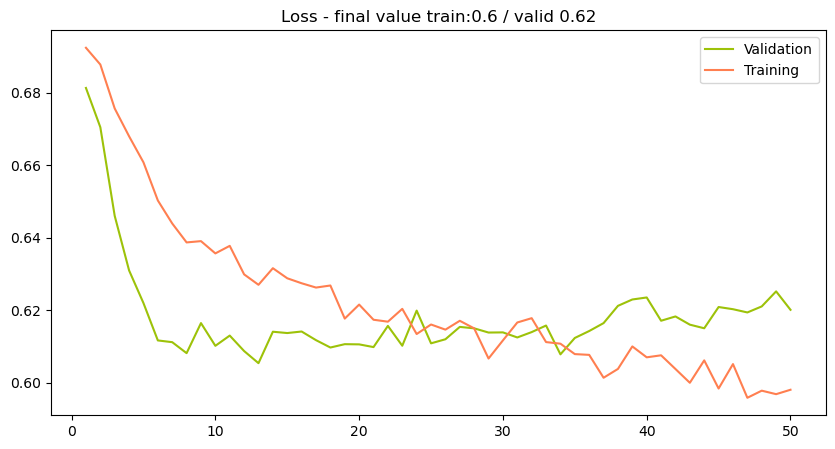

In [37]:
evaluation_plot(val_epoch_loss, train_epoch_loss, "Loss")

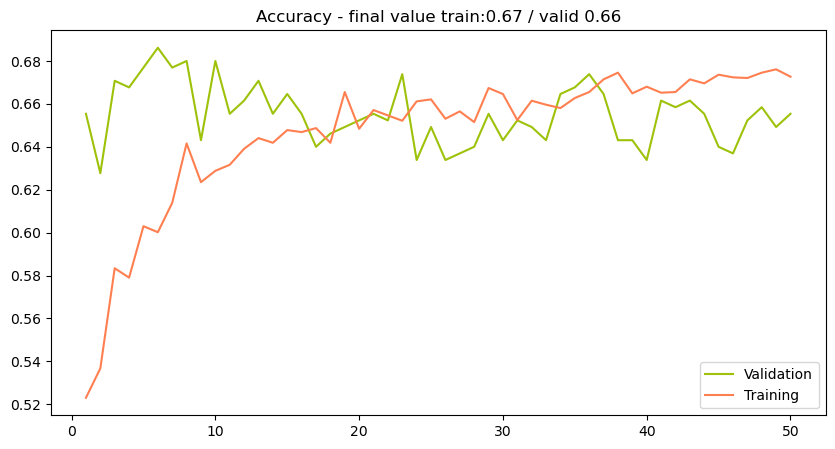

In [38]:
evaluation_plot(val_epoch_accuracy, train_epoch_accuracy, "Accuracy")

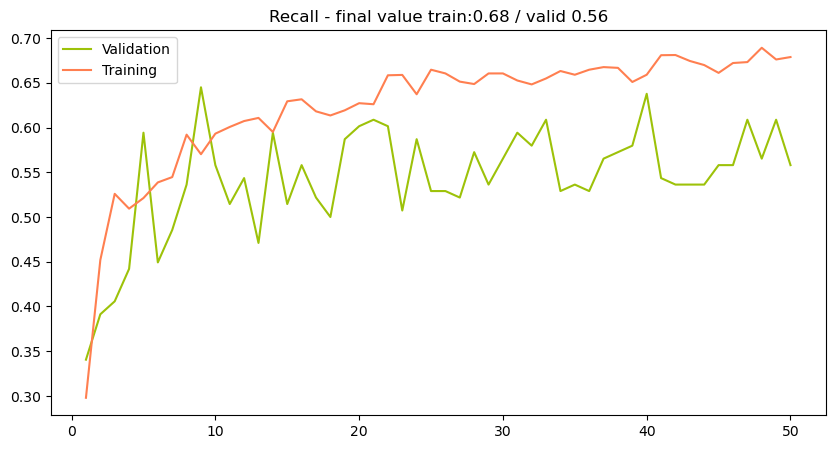

In [39]:
evaluation_plot(val_epoch_recall, train_epoch_recall, "Recall")

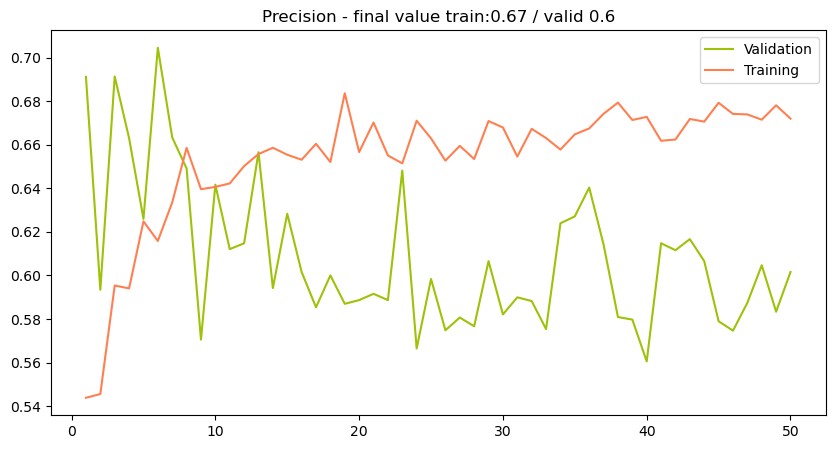

In [40]:
evaluation_plot(val_epoch_precision, train_epoch_precision, "Precision")

# Save the Model

If we later want to use our model we need to save it. We can do that by saving it's ```state_dict()```.

In [41]:
torch.save(model.state_dict(), 'water_model_weights.pth')

# Load the Model

We now pretend that we start a new notebook and want to apply our model. We have to initiate the model and load the weights. Note: be sure to call ```model.eval()``` method before applying the model to set the dropout and batch normalization layers to evaluation mode. If you forget to do this, it may yield to inconsistent inference results.

In [42]:
model = WaterNet()
model.load_state_dict(torch.load('water_model_weights.pth'))
model.eval()

WaterNet(
  (fc1): Linear(in_features=9, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

# Apply to Test Set

We now apply our trained model to the test data. We have our test data already prepared.

In [43]:
X_test.shape

(328, 9)

Create a dataset and wrap a DataLoader arround it.

In [44]:
# create a dataset
test_dataset = WaterDataset(X_test, y_test)

# wrap into dataloader
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)
print(f'test dataloader X: {next(iter(test_dataloader))[0].shape}')

test dataloader X: torch.Size([8, 9])


We can use the function defined for validation.

In [45]:
predictions, test_accuracy, test_loss, test_recall, test_precision = \
        valid(model, device, val_dataloader, criterion)
# save validation loss and accuracy for each epoch
print()
print(f"Accuracy on test set {test_accuracy:.4f}")
print(f"Loss on test set {test_loss.item():.4f}")
print(f"Recall on test set {test_recall.item():.4f}")
print(f"Precision on test set {test_precision.item():.4f}")

Validation: Average loss: 0.6201,                 Accuracy: 0.6554                (66%)

Accuracy on test set 0.6554
Loss on test set 0.6201
Recall on test set 0.5580
Precision on test set 0.6016
